<a href="https://colab.research.google.com/github/pleabargain/2017/blob/master/Copy_of_car_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Car Loan

https://mozo.com.au/interest-rates/guides/calculate-interest-on-loan

Beware prepayment fees: https://www.creditkarma.com/auto/i/refinance-your-auto-loan/

These loans are called amortizing loans - which means that the mathematical whizzes at your bank have worked them out so that you pay a set amount each month and at the end of your loan term, you’ll have paid off both interest and principal.

You can use an interest calculator to work out how much interest you’re paying all up, or, if you’d rather do it by hand, here’s how:

<b>(interest rate / number of payments) x (loan principal) = interest</b>

1-) Divide your interest rate by the number of payments you’ll make in the year (interest rates are expressed annually). So, for example, if you’re making monthly payments, divide by 12.

2-) Multiply it by the balance of your loan, which for the first payment, will be your whole principal amount.

This gives you the amount of interest you pay the first month.

So for example, on a personal loan of $30,000 over a period of 6 years at 8.40% p.a. and making monthly repayments:

(0.084 / 12) * 30,000 = 210

Because you’ve now begun to pay off your principal, to work out the interest you pay in the following months, you need to first calculate your new balance. So:

<b>principal - (repayment - interest) = new balance</b>

1-) Minus the interest you just calculated from the amount you repaid. This gives you the amount that you have paid off the loan principal.

Take this amount away from the original principal to find the new balance of your loan

2-) Take this amount away from the original principal to find the new balance of your loan. 

To work out ongogin interest payments, the easiest way is to break it up into a table. So using the above calculation, your calculations might look like this.

Keeping in mind that doing the calculations yourself means slight discrepancies due to rounding and human error, this should give you a pretty good idea of what you’re paying in interest each month.

# Calculating Refiancing Payments and Such

27k. 

3.59% 

72 months. 

Was 6.99%

https://superuser.com/questions/871404/what-would-be-the-the-mathematical-equivalent-of-this-excel-formula-pmt

California taxes vehicle purchases before rebates or incentives are applied to the price, which means that the buyer in this scenario will pay taxes on the vehicle as if it cost the full $10,000.

# Question 

I am interested in buying a 2019 Toyota Sienna for $31,115. I am curious how much it will cost me each month if I decide on financing my vehicle (take out a loan). This exercise is really about understanding how much of your equated monthly installment (EMI) is going toward paying off the loan and how much is about paying off the principal of the loan.  

Assume a dealership comes back with the following loan terms. APR of 4.37 (annual percentage rate) for 72 months

This blog will show you how much it costs and how much the loan payments are. 

https://economictimes.indiatimes.com/definition/emi

## Calculate EMI (monthly payment)

This is roughly how much your monthly payments will be on your loan. 

In [0]:
# Pv = Present Value (starting value of the loan) this is multiplied by tax
Pv = 31115 * 1.075

# California sales tax law 
# 7.5% state sales tax rate on the purchase of all vehicles

# Annual percentage rate
APR = .0359

# periodic interest rate = APR/number of periods per year
R = APR / 12

# Total number of interest periods (number of months)
n = 72

In [0]:
# I round up for this since if you round down you wont completely pay off the loan
emi = np.round(( (Pv * R) / (1 - (1 + R)**(-n)) ), 2)

In [4]:
print('Monthly payment is: ' + str(emi) )

Monthly payment is: 517.08


In [0]:
## This was how I found 

# this is EMI formula moved to find out the principal. 
#principal = ( (528.97) * (1 - (1 + (R))**-72) ) / (R)
#print(principal)

# Calculating for Payments as you have them. 

In [0]:
repayment = emi
principal = Pv
term = 72

def calc_interest(principal, repayment, interest_rate = 0.0359):
    
    
    # You cant pay fractional interst on a loan 
    interest_paid = np.floor( ((interest_rate / 12) * principal ) * 100) / 100
    
    principal_paid = np.round(repayment - interest_paid, 2)
    
    new_balance = np.round(principal - principal_paid,2)
    
    return(repayment, interest_paid, principal_paid, new_balance)

payment_lists = []



for month in range(1, term + 1):

        repayment, interest_paid, principal_paid, new_balance = calc_interest(principal, repayment)
        
        payment_lists.append([month, principal, repayment, interest_paid, principal_paid, new_balance])
        
        principal = np.round(new_balance,2)
        
        


In [0]:
payment_table = pd.DataFrame(payment_lists, columns = ['Month', 'Starting Balance','Repayment','Interest Paid','Principal Paid','New Balance'])

In [8]:
payment_table.tail()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
67,68,2562.35,517.08,7.66,509.42,2052.93
68,69,2052.93,517.08,6.14,510.94,1541.99
69,70,1541.99,517.08,4.61,512.47,1029.52
70,71,1029.52,517.08,3.07,514.01,515.51
71,72,515.51,517.08,1.54,515.54,-0.03


## Total Interest Paid on Loan

In [9]:
# Look into that last week. 
payment_table['Interest Paid'].sum(), payment_table['Principal Paid'].sum()

(3781.1, 33448.66)

(1, 72)

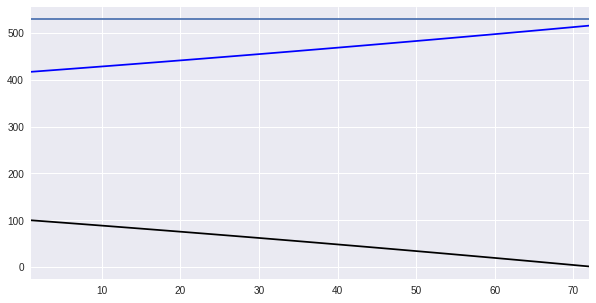

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.axhline(y = 528.97)
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k');
axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b');

axes.set_xlim((1, 72))

## Refinancing Cost Comparison

3.59% vs 6.99% (show the cost of refinancing a car, assuming no prepayment penalty)